In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

In [2]:
from sklearn.datasets import make_blobs

In [13]:
X, y = make_blobs(n_samples=300,
                  centers=4, 
                  random_state=0, 
                  cluster_std=1.0)

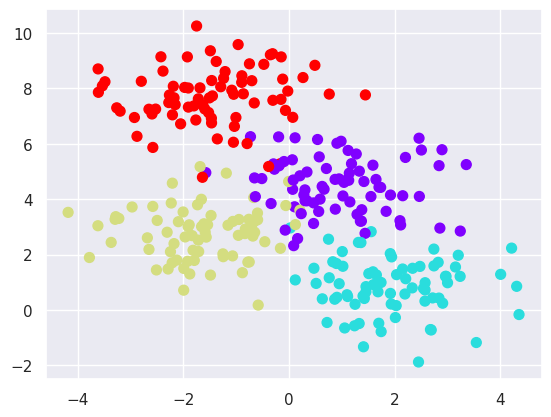

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [21]:
def visualize_classifer(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    #Drow train points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #Train model
    model.fit(X, y)
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    #Make color plot with results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, 
                          levels=np.arange(n_classes + 1) - 0.5,
                          cmap=cmap,
                          clim=(y.min(), y.max()), 
                          zorder=1)
    
    ax.set(xlim=xlim, ylim=ylim)

/tmp/ipykernel_8848/4030156401.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


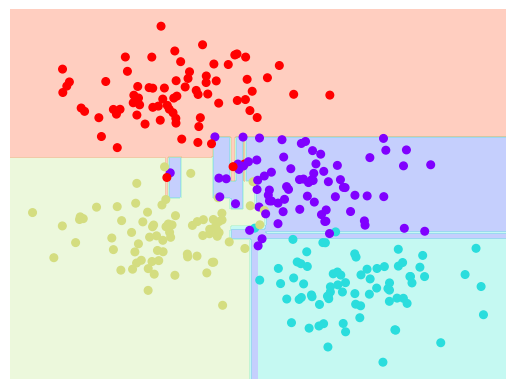

In [23]:
visualize_classifer(DecisionTreeClassifier(), X, y);

In [30]:
! curl https://github.com/jakevdp/PythonDataScienceHandbook --output helpers_05_08

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  203k    0  203k    0     0   178k      0 --:--:--  0:00:01 --:--:--  178k


In [32]:
import helpers_05_08

In [34]:
helpers_05_08.plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…